Computer Vision and Image Analysis Lab 2

In [2]:
import numpy as np
from scipy.signal import convolve2d, correlate2d
import matplotlib.pyplot as plt
from Functions import *

Tools


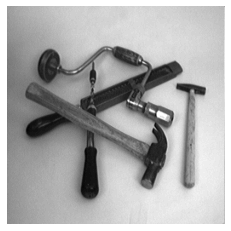

Size of tools:
(256, 256)
dxtools:


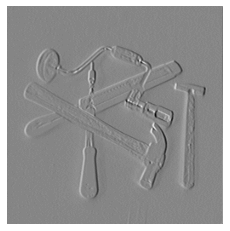

Size of dxtools:
(256, 254)
dytools:


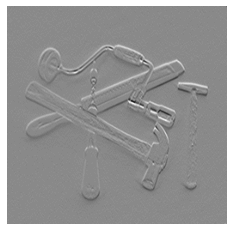

Size of dytools:
(254, 256)


In [3]:
#Exercice 1

def deltax():
    return np.array([[-1/2, 0, 1/2]])       #Central difference


def deltay():
    return np.transpose(np.array([[-1/2, 0, 1/2]]))     #Central difference

tools = np.load("Images-npy/few256.npy")

print('Tools')
showgrey(tools, True)

print('Size of tools:')
print(np.shape(tools))



dxtools = convolve2d(tools, deltax(), 'valid')
dytools = convolve2d(tools, deltay(), 'valid')

print('dxtools:')
showgrey(dxtools)
print('Size of dxtools:')
print(np.shape(dxtools))

print('dytools:')
showgrey(dytools)
print('Size of dytools:')
print(np.shape(dytools))


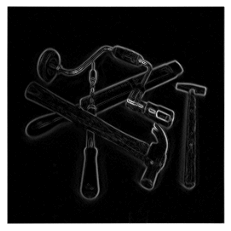

(array([136.,   0.,   0.,   0.,   0.,  45.,   0.,   0.,   0.,   0.,  37.,
          0.,   0.,   0.,   0.,  21.,   0.,   0.,   0.,   0.,  20.,   0.,
          0.,   0.,   0.,  20.,   0.,   0.,   0.,   0.,  24.,   0.,   0.,
          0.,   0.,  13.,   0.,   0.,   0.,   0.,  22.,   0.,   0.,   0.,
          0.,  10.,   0.,   0.,   0.,   0.,  23.,   0.,   0.,   0.,   0.,
         19.,   0.,   0.,   0.,   0.,  21.,   0.,   0.,   0.,   0.,  12.,
          0.,   0.,   0.,   0.,  15.,   0.,   0.,   0.,   0.,  18.,   0.,
          0.,   0.,   0.,  16.,   0.,   0.,   0.,   0.,  12.,   0.,   0.,
          0.,   0.,  12.,   0.,   0.,   0.,   0.,   6.,   0.,   0.,   0.,
          0.,   9.,   0.,   0.,   0.,   0.,   3.,   0.,   0.,   0.,   0.,
          4.,   0.,   0.,   0.,   0.,   4.,   0.,   0.,   0.,   0.,   3.,
          0.,   0.,   0.,   0.,   7.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   5.,   0.,   0.,   0.,   0.,   4.,   0.,   0.,
          0.,   0.,   4.,   0.,   0., 

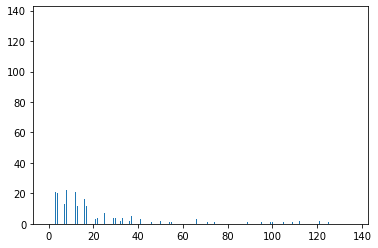

In [5]:
#Exercise 2

##Without smoothing

def Lv(inpic, shape = 'same'):
    Lx = convolve2d(inpic, deltax(), shape)
    Ly = convolve2d(inpic, deltay(), shape)
    return np.sqrt(Lx**2 + Ly**2)

#Gradient magnitude of each point
#gradmagntools = np.sqrt(dxtools[2:,:]**2 + dytools[:,2:]**2)  #Sizes of dxtools and dytools are different --> approx
gradmagntools = Lv(tools)
showgrey(gradmagntools, True)

#Histogram of the gradient magnitude
a, bins = np.histogram(gradmagntools, bins = 'auto')
plt.hist(a, bins)

threshold = 0.1


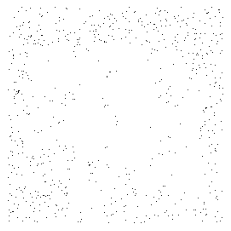

threshold = 1


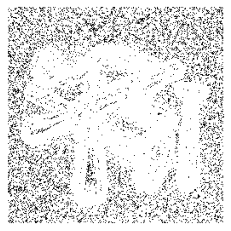

threshold = 5


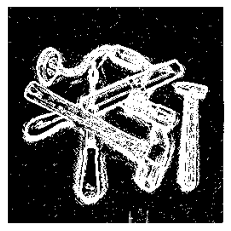

threshold = 10


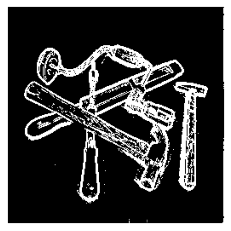

threshold = 20


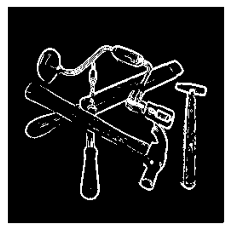

threshold = 50


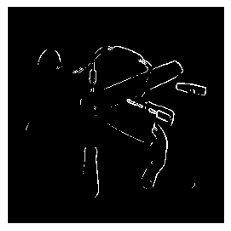

threshold = 100


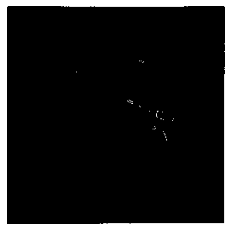

In [103]:

print('threshold = 0.1')
showgrey((gradmagntools > 0.1).astype(int), True)
print('threshold = 1')
showgrey((gradmagntools > 1).astype(int), True)
print('threshold = 5')
showgrey((gradmagntools > 5).astype(int), True)
print('threshold = 10')
showgrey((gradmagntools > 10).astype(int), True)
print('threshold = 20')
showgrey((gradmagntools > 20).astype(int), True)
print('threshold = 50')
showgrey((gradmagntools > 50).astype(int), True)
print('threshold = 100')
showgrey((gradmagntools > 100).astype(int), True)

def Lv(inpic, shape = 'same'):
    Lx = convolve2d(inpic, dxtools, shape)
    Ly = convolve2d(inpic, dytools, shape)
    return np.sqrt(Lx**2 + Ly**2)

#print(Lv(tools))
#a, bins = np.histogram(Lv(tools), bins = 'auto')
#plt.hist(a,bins)

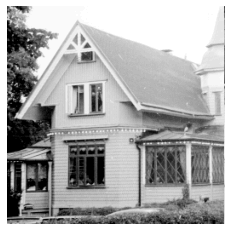

(256, 256) (256, 256) (256, 256)


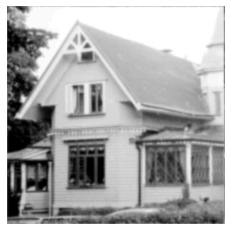

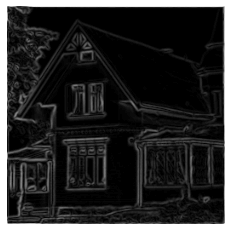

(array([ 0., 11., 12.,  0., 10.,  8.,  0.,  7., 10.,  0.,  5.,  4.,  0.,
         3.,  4.,  0.,  4.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,
         2.,  0.,  0.,  1.,  0.,  0.,  1.,  0.,  0.,  2.,  0.,  0.,  0.,
         0.,  0.,  0.,  1.,  2.,  0.,  1.,  1.,  0.,  1.,  1.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,  0.,  0.,
         2.,  0.,  1.,  0.,  0.,  0.,  1.,  0.,  1.,  0.,  0.,  1.,  1.,
         0.,  0.,  0.,  1.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,
         0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,
         1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         2.,  1.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.

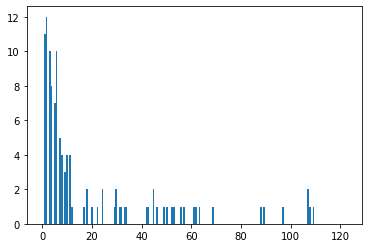

In [6]:
#Question 3

##With another image + smoothing


#Original image
house = np.load("Images-npy/godthem256.npy")
showgrey(house, True)

#Smoothen image (Gaussian filter)
house_gauss = discgaussfft(house, 1)
showgrey(house_gauss, True)

'''
#Derivatives of the smoothen image
dxhouse = convolve2d(house_gauss, deltax(), 'valid')
dyhouse = convolve2d(house_gauss, deltay(), 'valid')

gradmagnhouse_gauss = np.sqrt(dxhouse[2:,:]**2 + dyhouse[:,2:]**2)  #Sizes of dxtools and dytools are different --> approx
'''

#Gradient magnitude 
gradmagnhouse_gauss = Lv(house_gauss)
showgrey(gradmagnhouse_gauss, True)

#Histogram of the gradient magnitude of the smoothen image
a, bins = np.histogram(gradmagnhouse_gauss, bins = 'auto')
plt.hist(a, bins)


threshold = 0.1


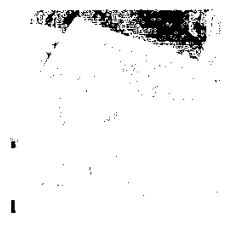

threshold = 1


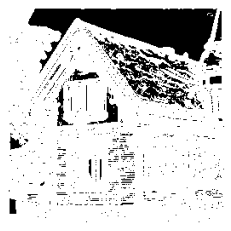

threshold = 5


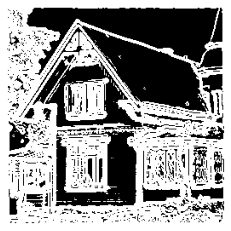

threshold = 10


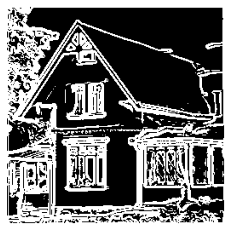

threshold = 20


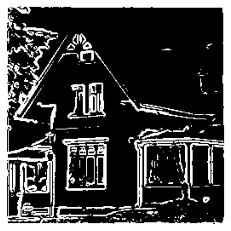

threshold = 50


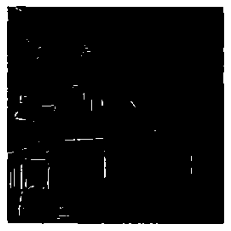

threshold = 100


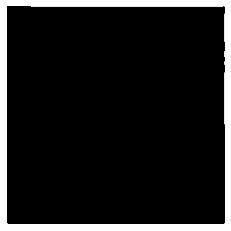

In [7]:
#Thresholding on the gradient magnitude of each point

print('threshold = 0.1')
showgrey((gradmagnhouse_gauss > 0.1).astype(int), True)
print('threshold = 1')
showgrey((gradmagnhouse_gauss > 1).astype(int), True)
print('threshold = 5')
showgrey((gradmagnhouse_gauss > 5).astype(int), True)
print('threshold = 10')
showgrey((gradmagnhouse_gauss > 10).astype(int), True)
print('threshold = 20')
showgrey((gradmagnhouse_gauss > 20).astype(int), True)
print('threshold = 50')
showgrey((gradmagnhouse_gauss > 50).astype(int), True)
print('threshold = 100')
showgrey((gradmagnhouse_gauss > 100).astype(int), True)

threshold = 0.1


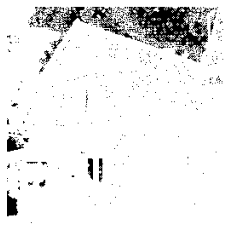

threshold = 1


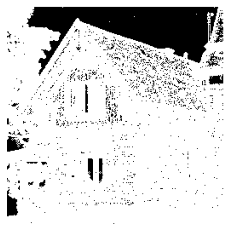

threshold = 5


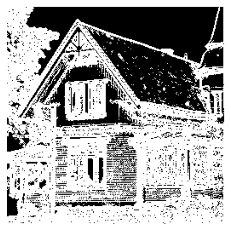

threshold = 10


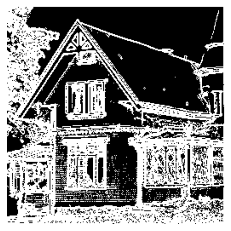

threshold = 20


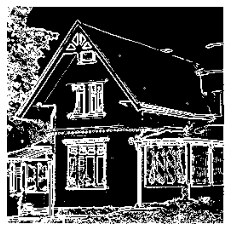

threshold = 50


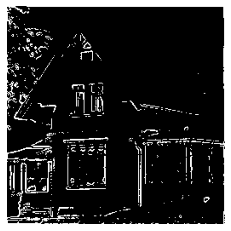

threshold = 100


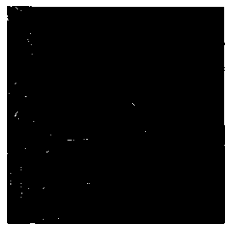

(array([19.,  1.,  2.,  3.,  2.,  3.,  1.,  1.,  2.,  2.,  1.,  5.,  2.,
         0.,  0.,  0.,  0.,  1.,  1.,  1.,  2.,  1.,  1.,  1.,  1.,  0.,
         0.,  0.,  0.,  2.,  1.,  0.,  1.,  0.,  0.,  1.,  0.,  0.,  1.,
         0.,  0.,  0.,  0.,  0.,  3.,  3.,  0.,  0.,  0.,  1.,  2.,  0.,
         0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  2.,  0.,  0.,  1.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  1.,  1.,  0.,  0.,  0.,  1.,  0.,  1.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,
         2.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,
         0.,  0.,  0.,  0.,  1.,  0.,  0.,  1.,  0.,  1.,  0.,  0.,  0.,
         1.,  0.]),
 array([  0.        ,   1.00446092,   2.00892184,   3.01338275,
          4.01784367,   5.02230459,   6.02676551,   7.03122643,
          8.03568734,   9.04014826,  10.04460918,

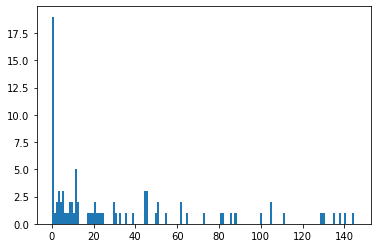

In [8]:
##Without smoothing

'''
dxhouse = convolve2d(house, deltax(), 'valid')
dyhouse = convolve2d(house, deltay(), 'valid')

gradmagnhouse = np.sqrt(dxhouse[2:,:]**2 + dyhouse[:,2:]**2)  #Sizes of dxtools and dytools are different --> approx
'''

gradmagnhouse = Lv(house)

print('threshold = 0.1')
showgrey((gradmagnhouse > 0.1).astype(int), True)
print('threshold = 1')
showgrey((gradmagnhouse > 1).astype(int), True)
print('threshold = 5')
showgrey((gradmagnhouse > 5).astype(int), True)
print('threshold = 10')
showgrey((gradmagnhouse > 10).astype(int), True)
print('threshold = 20')
showgrey((gradmagnhouse > 20).astype(int), True)
print('threshold = 50')
showgrey((gradmagnhouse > 50).astype(int), True)
print('threshold = 100')
showgrey((gradmagnhouse > 100).astype(int), True)

a, bins = np.histogram(gradmagnhouse, bins = 'auto')
plt.hist(a, bins)


In [10]:
#Exercise 4

'''
def deltaxx():
    return np.array([[1, -2, 1]])

def deltayy():
    return np.transpose(np.array([[1, -2, 1]]))

def deltaxy():
    return convolve2d(deltax(),deltay(),'same')

def deltaxxx():
    return convolve2d(deltax(),deltaxx(),'same')

print(deltaxxx())

def deltaxxy():
    return convolve2d(deltaxx(),deltay(),'same')

def Lv(inpic, shape = 'same'):
    Lx = convolve2d(inpic, deltax(), shape)
    Ly = convolve2d(inpic, deltay(), shape)
    return np.sqrt(Lx**2 + Ly**2)

def Lvvtilde(inpic, shape = 'same'):
    Lx = convolve2d(inpic, deltax(), shape)
    Ly = convolve2d(inpic, deltay(), shape)
    Lxx = convolve2d(inpic, deltaxx(), shape)
    Lyy = convolve2d(inpic, deltayy(), shape)
    Lxy = convolve2d(inpic, deltaxy(), shape)
    return (Lx**2)*Lxx + 2*Lx*Ly*Lxy + (Ly**2)*Lyy



[x, y] = np.meshgrid(range(-5, 6), range(-5, 6))
#print('x**3')
#print(x**3)
#print('--------------------')
#print('x**3 and deltaxxx')
print(convolve2d(x**3, deltaxxx(), 'valid'))
print(convolve2d(convolve2d(convolve2d(x**3, deltax(), 'valid'), deltax(), 'valid'), deltax(), 'valid'))
#print('--------------------')
#print('x**3 and deltax')
#print(convolve2d(x**3, deltax(), 'valid'))
'''

#First derivatives

dxmask = np.zeros((5,5))
dxmask[2,:] = [0, 0.5, 0, -0.5, 0]
dymask = np.transpose(dxmask)

#Second derivatives
dxxmask = np.zeros((5,5))
dxxmask[2,:] = [0, 1, -2, 1, 0]
dyymask = np.transpose(dxxmask)
dxymask = convolve2d(dxmask, dymask, 'same')

#Third derivatives
dxxxmask = convolve2d(dxmask, dxxmask, 'same')
dxxxxmask = convolve2d(dxmask,dxxxmask,'same')
dyyymask = convolve2d(dymask, dyymask, 'same')
dxxymask = convolve2d(dxxmask, dymask, 'same')
dxyymask = convolve2d(dxmask, dyymask, 'same')

#Test

[x, y] = np.meshgrid(range(-5, 6), range(-5, 6))
print('x**3')
print(x**3)
print('--------------------')
print('x**3 and dxmask')
print(convolve2d(x**3, dxmask, 'valid'))
print('--------------------')
print('x**3 and dxxxmask')
print(convolve2d(x**3, dxxxmask, 'valid'))
print(convolve2d(x**3,dxxxxmask,'valid'))

#Functions

def Lv(inpic, shape = 'same'):
    Lx = convolve2d(inpic, dxmask, shape)
    Ly = convolve2d(inpic, dymask, shape)
    return np.sqrt(Lx**2 + Ly**2)

def Lvvtilde(inpic, shape = 'same'):
    Lx = convolve2d(inpic, dxmask, shape)
    Ly = convolve2d(inpic, dymask, shape)
    Lxx = convolve2d(inpic, dxxmask, shape)
    Lyy = convolve2d(inpic, dyymask, shape)
    Lxy = convolve2d(inpic, dxymask, shape)
    return (Lx**2)*Lxx + 2*Lx*Ly*Lxy + (Ly**2)*Lyy


def Lvvvtilde(inpic,shape = 'same'):
    Lx = convolve2d(inpic, dxmask, shape)
    Ly = convolve2d(inpic, dymask, shape)
    Lxx = convolve2d(inpic, dxxmask, shape)
    Lyy = convolve2d(inpic, dyymask, shape)
    Lxy = convolve2d(inpic, dxymask, shape)
    Lxxx = convolve2d(inpic, dxxxmask, shape)
    Lyyy = convolve2d(inpic, dyyymask, shape)
    Lxxy = convolve2d(inpic, dxxymask, shape)
    Lxyy = convolve2d(inpic, dxyymask, shape)
    return (Lx**3)*Lxxx + 3*(Lx**2)*Ly*Lxxy + 3*Lx*(Ly**2)*Lxyy + (Ly**3)*Lyyy




x**3
[[-125  -64  -27   -8   -1    0    1    8   27   64  125]
 [-125  -64  -27   -8   -1    0    1    8   27   64  125]
 [-125  -64  -27   -8   -1    0    1    8   27   64  125]
 [-125  -64  -27   -8   -1    0    1    8   27   64  125]
 [-125  -64  -27   -8   -1    0    1    8   27   64  125]
 [-125  -64  -27   -8   -1    0    1    8   27   64  125]
 [-125  -64  -27   -8   -1    0    1    8   27   64  125]
 [-125  -64  -27   -8   -1    0    1    8   27   64  125]
 [-125  -64  -27   -8   -1    0    1    8   27   64  125]
 [-125  -64  -27   -8   -1    0    1    8   27   64  125]
 [-125  -64  -27   -8   -1    0    1    8   27   64  125]]
--------------------
x**3 and dxmask
[[28. 13.  4.  1.  4. 13. 28.]
 [28. 13.  4.  1.  4. 13. 28.]
 [28. 13.  4.  1.  4. 13. 28.]
 [28. 13.  4.  1.  4. 13. 28.]
 [28. 13.  4.  1.  4. 13. 28.]
 [28. 13.  4.  1.  4. 13. 28.]
 [28. 13.  4.  1.  4. 13. 28.]]
--------------------
x**3 and dxxxmask
[[6. 6. 6. 6. 6. 6. 6.]
 [6. 6. 6. 6. 6. 6. 6.]
 [6. 6. 6. 6. 

scale= 0.0001
(256, 256) (256, 256) (256, 256)


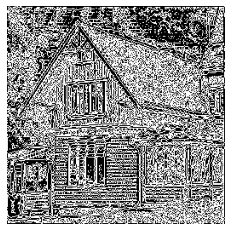

scale= 1.0
(256, 256) (256, 256) (256, 256)


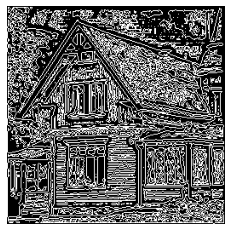

scale= 4.0
(256, 256) (256, 256) (256, 256)


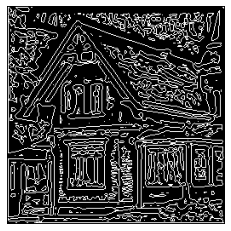

scale= 16.0
(256, 256) (256, 256) (256, 256)


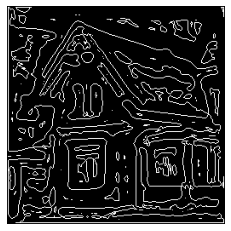

scale= 64.0
(256, 256) (256, 256) (256, 256)


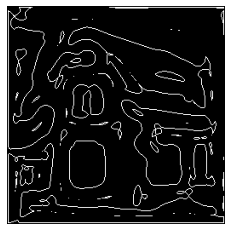

-------------------------------
(256, 256) (256, 256) (256, 256)


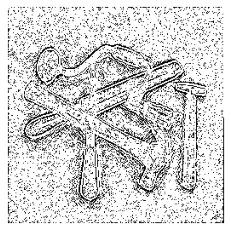

(256, 256) (256, 256) (256, 256)


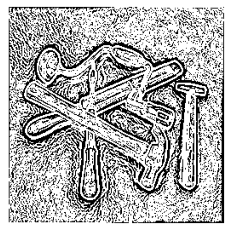

(256, 256) (256, 256) (256, 256)


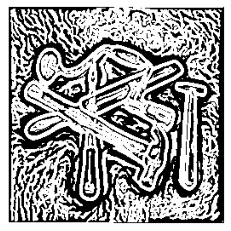

(256, 256) (256, 256) (256, 256)


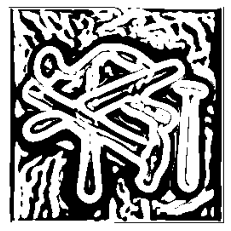

(256, 256) (256, 256) (256, 256)


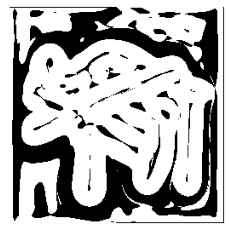

In [108]:
#Question 4

house = np.load("Images-npy/godthem256.npy")
scale = [0.0001, 1.0, 4.0, 16.0, 64.0]

for sc in scale:
    print('scale=',sc)
    showgrey(contour(Lvvtilde(discgaussfft(house, sc), 'same')), True)   #contour finds the zero crossings in an image

print('-------------------------------')

tools = np.load("Images-npy/few256.npy")
for sc in scale:
    showgrey((Lvvvtilde(discgaussfft(tools, sc), 'same')<0).astype(int), True)    #Points such as Lvvvtilde < 0


In [12]:
#Exercize 5

def extractedge(inpic, scale, threshold=None):
    #Step 1: Convolve image with Gaussian kernel
    conv_image = discgaussfft(inpic, scale)

    #Step 2: Compute Lvvtilde and Lvvvtilde
    Lvv = Lvvtilde(conv_image)
    Lvvv = Lvvvtilde(conv_image)

    #Step 3: Edges detection criteria
    curves = zerocrosscurves(Lvv, (Lvvv<0).astype(int))
    
    if threshold!=None :
        curves = thresholdcurves(curves, (Lv(inpic)>threshold))    
    return curves

curves=extractedge(house,5)
print()

(256, 256) (256, 256) (256, 256)



(256, 256) (256, 256) (256, 256)
(256, 256) (256, 256) (256, 256)
(256, 256) (256, 256) (256, 256)
(256, 256) (256, 256) (256, 256)
(256, 256) (256, 256) (256, 256)
(256, 256) (256, 256) (256, 256)
(256, 256) (256, 256) (256, 256)
(256, 256) (256, 256) (256, 256)
(256, 256) (256, 256) (256, 256)
(256, 256) (256, 256) (256, 256)
(256, 256) (256, 256) (256, 256)
(256, 256) (256, 256) (256, 256)
(256, 256) (256, 256) (256, 256)
(256, 256) (256, 256) (256, 256)
(256, 256) (256, 256) (256, 256)
(256, 256) (256, 256) (256, 256)
(256, 256) (256, 256) (256, 256)
(256, 256) (256, 256) (256, 256)
(256, 256) (256, 256) (256, 256)
(256, 256) (256, 256) (256, 256)
(256, 256) (256, 256) (256, 256)


/anaconda3/envs/venv/lib/python3.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


(256, 256) (256, 256) (256, 256)
(256, 256) (256, 256) (256, 256)
(256, 256) (256, 256) (256, 256)


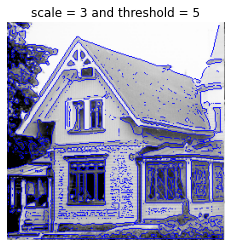

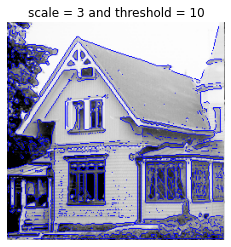

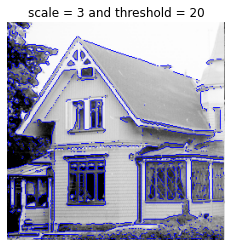

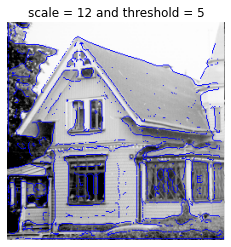

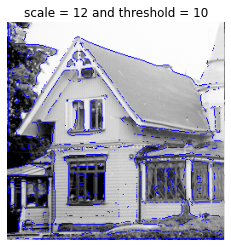

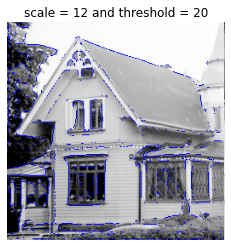

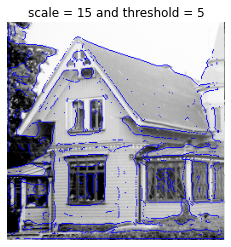

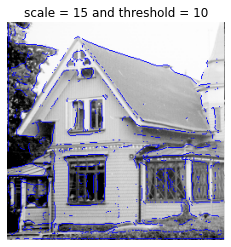

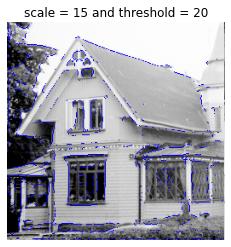

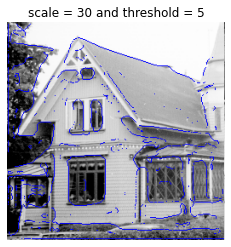

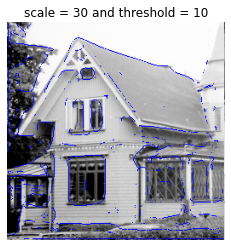

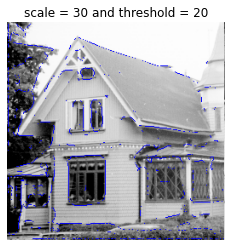

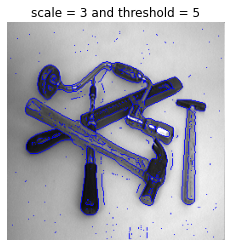

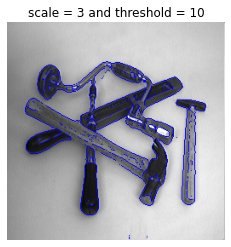

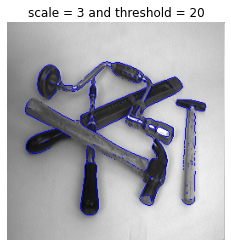

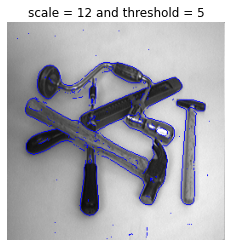

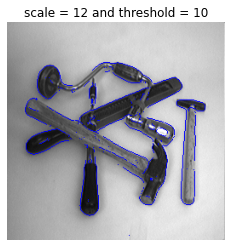

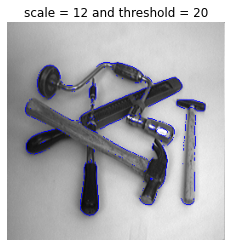

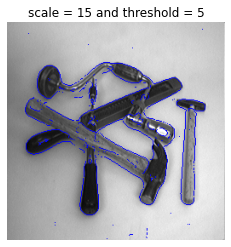

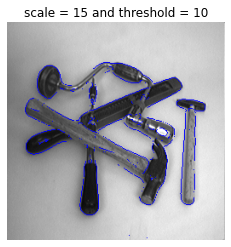

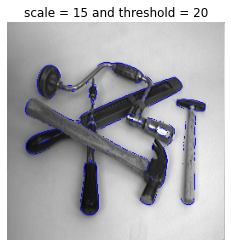

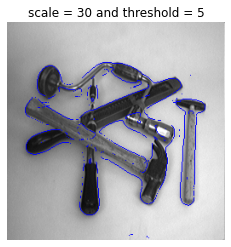

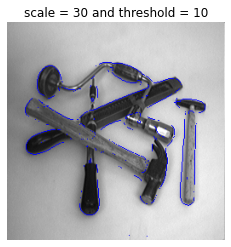

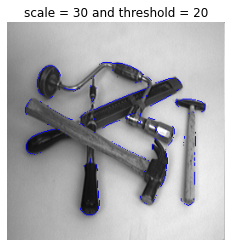

<Figure size 432x288 with 0 Axes>

In [13]:
#5) Extraction of edge segments
th=[5,10,20]
scale=[3,12,15,30]

for sc in scale :
    for tresh in th :    
        plt.title('scale = ' + str(sc)+' and threshold = '+str(tresh))
        overlaycurves(house, extractedge(house, sc, tresh ))
        plt.figure()



for sc in scale :
    for tresh in th :
        plt.title('scale = ' + str(sc)+' and threshold = '+str(tresh))
        overlaycurves(tools, extractedge(tools, sc, tresh ))
        plt.figure()

In [14]:
#6) Hough transform
#def coord(x,y) :
#    rho=(x**2+y**2)**(1/2)
#    if x==0 :
#        theta=math.copysign(90,y)
#    else : 
#        theta=np.arctan2(y/x)
#    return rho,theta
def trace_ligne(rho,theta,image) :
    len_y=len(image[1])
    len_x=len(image[0])
    x1=rho*np.cos(theta) 
    y1=rho*np.sin(theta)
    if np.abs(x1)<10**(-2) :
        point1=[0,y1]
        point2=[len_x,y1]
    else : 
        if np.abs(y1)<10**(-2) :
            point1=[x1,0]
            point2=[x1,len_y]
    #a*x_+b*y_+c=0
        else :
            def compute_y(theta,rho,x) :
                return(-x*(np.cos(theta)/np.sin(theta))+rho/np.sin(theta))
            point1=[0,compute_y(theta,rho,0)]
            point2=[250,compute_y(theta,rho,250)] 
                   
    plt.plot( [point1[1],point2[1]],[point1[0], point2[0]], 'r-')
    plt.xlim(0,len_x)
    plt.ylim(0,len_y)


def houghline(curves, magnitude, nrho, ntheta, threshold, nlines=None,image=None, verbose=None,):  #je suppose "curves" sous la forme (x1,x2,x3)(y1,y2,y3)
    
    r_max=int((len(image[0])**2+len(image[1])**2)**(1/2))
    print('rho_max=', r_max)
    theta_values=np.linspace(-math.pi/2, math.pi/2, ntheta)
    rho_values=np.linspace(-r_max, r_max, nrho)
    # Allocate accumulator space
    acc=np.zeros([nrho,ntheta])
    linepar=[]
    # Define a coordinate system in the accumulator space 
    #print('rho values= ', rho_values)
    # Loop over all the edge points
    #print('minmum_i= ',(min(len(curves[0]),len(curves[1]))))
    for i in range(min(len(curves[0]),len(curves[1]))) :
        #element=[[curves[0][i]],curves[1][i]]
        # Optionally, keep value from magnitude image
        #magni_elem=magnitude[element]
        # Check if valid point with respect to threshold
        X_=curves[0][i]
        Y_=curves[1][i]
        if magnitude[X_,Y_]>threshold :
            # Loop over a set of theta values   
            for theta_index,theta in enumerate(theta_values) :
                # Compute rho for each theta value
                rho=X_*math.cos(theta)+Y_*math.sin(theta)
                # Compute index values in the accumulator space

                #print('rho= ',rho)
    
                rho_index=np.argmin([(np.abs(rho_val-rho)) for rho_val in rho_values])
                    #print('rho index = ',rho_index)
                
                    # Update the accumulator
                acc[rho_index][theta_index]+=(magnitude[X_,Y_])
                
    
    plt.figure()
    # Extract local maxima from the accumulator
    loc=locmax8(acc)
    pos=loc[0]
    value=loc[1]
    #print("Values")
    #print(value)
    #print("OK3")
    # Delimit the number of responses if necessary
    indexvector = np.argsort(value)[-nlines:]
    #print(pos)
    new_pos=[]
    showgrey(acc)
    for idx in indexvector :
        new_pos.append(pos[idx])
    #print(new_pos)
    #print(value)
    #print(new_pos)
    # Compute a line for each one of the strongest responses in the accumulator
    len_newpose=len(new_pos)
    for idx in range(min(nlines,len(new_pos))):
        #print(new_pos[idx])
        thetaidxacc = new_pos[len_newpose-idx-1][0]
        rhoidxacc = new_pos[len_newpose-idx-1][1]
        #print(len(rho_values))
        #print(len(theta_values))
        temporary_rho=rho_values[rhoidxacc]
        temporary_theta=theta_values[thetaidxacc]
        #print(temporary_rho)
        #print(temporary_theta)
        x0 = temporary_rho
        y0 = 0
        dx =0
        dy =temporary_rho
        linepar.append([temporary_rho,temporary_theta])
        #print('theta =',temporary_theta)
        #print('rho =',temporary_rho)
        trace_ligne(temporary_rho,temporary_theta,image)
    # Overlay these curves on the gradient magnitude image
    #overlaycurves(image, extractedge(image,scale ,gradmagnhouse ))
    # Return the output data [linepar, acc]

    return [linepar,acc]



def houghedgeline(pic,scale,gradmagnthreshold,nrho,ntheta,nlines,verbose=None) :
    #print('curve',extractedge(pic,scale,gradmagnthreshold))
    magnitude = Lv(discgaussfft(pic, scale))
    edge_pic=extractedge(pic,scale,gradmagnthreshold)
    houghline(edge_pic,magnitude,nrho,ntheta,gradmagnthreshold,nlines,pic)
    #overlaycurves(pic, extractedge(pic,scale ,gradmagnhouse ))
    plt.figure()
    #showgrey(pic)
    plt.xlim(0,len(pic[0]))
    plt.ylim(0,len(pic[1]))
    return []

(256, 256) (256, 256) (256, 256)
(256, 256) (256, 256) (256, 256)
rho_max= 362


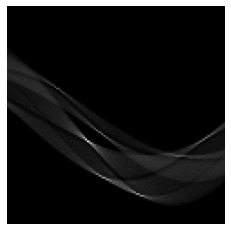

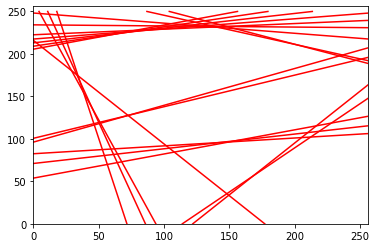

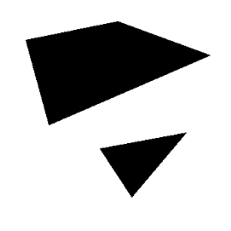

'"\nB=[1,5,4,8,9,3,2,6,4,15,16,111,2,10]\nprint(B)\nprint(np.argsort(B))\nC=np.argsort(B)[-3:]\nprint(C)\nB[11]\n'

In [15]:
testimage1 = np.load("Images-npy/triangle128.npy")

testimage2 = np.load("Images-npy/houghtest256.npy")

A=[[1,2,3],[4,5,6]]

houghedgeline(testimage2,100,0.1,120,120,20)

showgrey(testimage2)

""""""""""""""""
B=[1,5,4,8,9,3,2,6,4,15,16,111,2,10]
print(B)
print(np.argsort(B))
C=np.argsort(B)[-3:]
print(C)
B[11]
"""""""""""""""


(256, 256) (256, 256) (256, 256)
(256, 256) (256, 256) (256, 256)
rho_max= 362


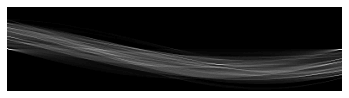

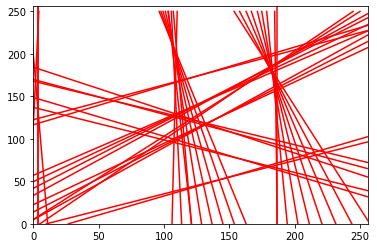

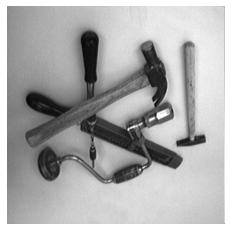

'"\nB=[1,5,4,8,9,3,2,6,4,15,16,111,2,10]\nprint(B)\nprint(np.argsort(B))\nC=np.argsort(B)[-3:]\nprint(C)\nB[11]\n'

In [16]:
testimage1 = np.load("Images-npy/triangle128.npy")

testimage2 = np.load("Images-npy/houghtest256.npy")

A=[[1,2,3],[4,5,6]]
tools = np.load("Images-npy/few256.npy")
houghedgeline(tools,100,0.1,100,400,40)

showgrey(tools)

""""""""""""""""
B=[1,5,4,8,9,3,2,6,4,15,16,111,2,10]
print(B)
print(np.argsort(B))
C=np.argsort(B)[-3:]
print(C)
B[11]
"""""""""""""""
